<a href="https://colab.research.google.com/github/Mochammad-Hanif/Tugas_Proyek_Akhir/blob/main/Tugas_Proyek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anggota Kelompok:**

* W.Adhika Aditama (24523064)
* Mochammad Hanif (24523034)

1. **Latar Belakang**
* **Mengapa model ini perlu dibuat?** Kanker payudara adalah salah satu penyebab utama kematian pada wanita. Memprediksi apakah pasien akan bertahan hidup (Status: Alive) atau meninggal (Status: Dead) berdasarkan data klinis awal sangat penting untuk menentukan urgensi dan jenis pengobatan yang tepat.

* **Siapa yang akan menggunakan model tersebut?** Tenaga medis (dokter onkologi) dan peneliti kesehatan.

* **Tujuan:** Membantu dokter memperkirakan prognosis pasien berdasarkan karakteristik tumor (ukuran, stadium, grade) dan demografi pasien.

2. **Penjelasan Data**

    Berdasarkan Breast_Cancer.csv, berikut adalah variabel yang kita gunakan:

* **Target (Label):** Kolom Status (Alive / Dead).

* **Fitur (Input):**
    * Numerik: Age, Tumor Size, Regional Node Examined, Reginol Node Positive.

    * Kategorikal: Race, Marital Status, T Stage, N Stage, 6th Stage, differentiate, Grade, A Stage, Estrogen Status, Progesterone Status.

3. **Metode & Algoritma**
    1. **Preprocessing:**
    * Mengubah data kategorikal menjadi angka (Encoding). Kita akan menggunakan Label Encoding untuk target dan One-Hot Encoding untuk fitur kategorikal
    * Membagi data menjadi data latih (Train) dan data uji (Test).

    2. **Algoritma:**
    * Kita akan menggunakan Random Forest Classifier. Algoritma ini dipilih karena sangat baik dalam menangani campuran data numerik dan kategorikal serta memiliki akurasi yang umumnya tinggi untuk data medis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# --- 1. MEMUAT DATA ---
# Pastikan file csv berada di folder yang sama
df = pd.read_csv('Breast_Cancer.csv')

print("Informasi Data Awal:")
print(df.info())

Informasi Data Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-nu

In [ ]:
# --- 2. PREPROCESSING ---


X = df.drop(['Status', 'Survival Months'], axis=1)
y = df['Status']

# B. Encoding (Mengubah teks menjadi angka)
# Untuk Fitur Kategorikal (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Untuk Target (Label Encoding: Alive/Dead -> 0/1)
le = LabelEncoder()
y = le.fit_transform(y)
# Simpan mapping untuk referensi nanti
print(f"\nMapping Target: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# C. Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mapping Target: {'Alive': np.int64(0), 'Dead': np.int64(1)}


In [ ]:
# --- 3. PEMODELAN (MODELING) ---
# Menggunakan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


--- HASIL EVALUASI MODEL ---
Akurasi: 0.8583850931677018

Laporan Klasifikasi (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

       Alive       0.87      0.98      0.92       685
        Dead       0.58      0.17      0.27       120

    accuracy                           0.86       805
   macro avg       0.73      0.58      0.60       805
weighted avg       0.83      0.86      0.82       805



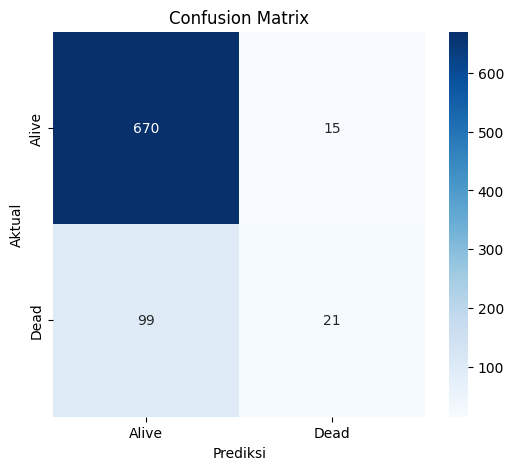

In [ ]:
# --- 4. EVALUASI (Sesuai Poin 4b & 5) ---
y_pred = model.predict(X_test)

print("\n--- HASIL EVALUASI MODEL ---")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

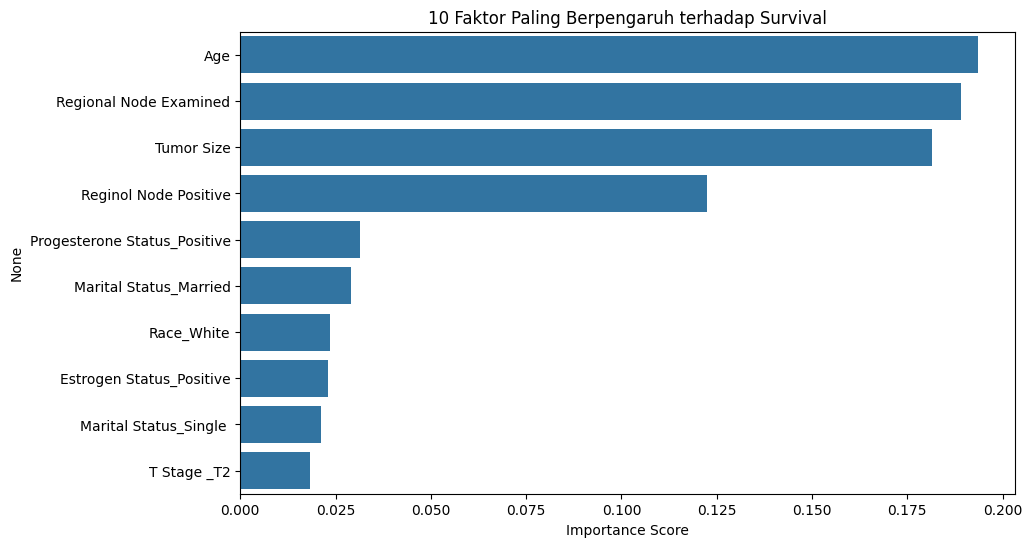

In [ ]:
# --- 5. FITUR PENTING (Optional Insight) ---1
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("10 Faktor Paling Berpengaruh terhadap Survival")
plt.xlabel("Importance Score")
plt.show()

5. Hasil Evaluasi
Setelah menjalankan kode di atas, Anda akan mendapatkan output statistik. Berikut cara membacanya untuk laporan Anda:

* **Akurasi:** Berapa persen model menebak benar (Alive/Dead).

* **Precision (Presisi):** Dari semua pasien yang diprediksi Dead oleh model, berapa persen yang benar-benar Dead? (Penting agar tidak membuat panik pasien yang sebenarnya aman).

* **Recall (Sensitivitas):** Dari semua pasien yang sebenarnya Dead, berapa persen yang berhasil dideteksi oleh model? (Penting agar dokter tidak melewatkan pasien berisiko tinggi).

* **Confusion Matrix:** Menunjukkan jumlah True Positive, True Negative, dll.

* **Feature Importance:** Kemungkinan besar faktor seperti Tumor Size, Regional Node Positive, atau Stage akan muncul sebagai faktor paling berpengaruh. Ini bisa Anda bahas di bagian "Penjelasan tentang data".

In [ ]:
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- BAGIAN 1: PERSIAPAN DATA & TRAINING MODEL ---

# 1. Load Data
try:
    df = pd.read_csv('Breast_Cancer.csv')
except FileNotFoundError:
    print("Error: File 'Breast_Cancer.csv' tidak ditemukan. Pastikan file ada di folder yang sama.")
    exit()

# Bersihkan nama kolom dari spasi yang tidak perlu
df.columns = df.columns.str.strip()

# 2. Seleksi Fitur untuk Demo
# Agar UI Gradio tidak terlalu panjang, kita ambil 5 fitur utama yang paling berpengaruh
# Namun, untuk tugas akhir, Anda bisa memasukkan semua kolom jika mau.
selected_features = ['Age', 'Tumor Size', 'Reginol Node Positive',
                     'T Stage', 'Grade', 'Estrogen Status']
target = 'Status'

data = df[selected_features + [target]].copy()

# 3. Encoding (Mengubah Teks ke Angka)
# Kita simpan encoder-nya agar bisa dipakai saat prediksi input user nanti
encoders = {}
for col in ['T Stage', 'Grade', 'Estrogen Status']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le  # Simpan encoder

# Encode Target (Alive/Dead)
le_target = LabelEncoder()
data[target] = le_target.fit_transform(data[target])

# 4. Split & Train Model
X = data[selected_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Cek Akurasi sebentar untuk memastikan model oke
acc = accuracy_score(y_test, model.predict(X_test))
print(f"Model berhasil dilatih! Akurasi pada data test: {acc:.2%}")

# --- BAGIAN 2: FUNGSI PREDIKSI UNTUK GRADIO ---

def predict_survival(age, tumor_size, nodes, t_stage, grade, estrogen):
    try:
        # 1. Ubah input dari Dropdown Gradio menjadi angka menggunakan encoder yang sudah dilatih
        t_stage_enc = encoders['T Stage'].transform([t_stage])[0]
        grade_enc = encoders['Grade'].transform([grade])[0]
        estrogen_enc = encoders['Estrogen Status'].transform([estrogen])[0]

        # 2. Buat DataFrame untuk satu baris data ini
        input_data = pd.DataFrame([[age, tumor_size, nodes, t_stage_enc, grade_enc, estrogen_enc]],
                                  columns=selected_features)

        # 3. Prediksi
        prediction_index = model.predict(input_data)[0]
        prediction_label = le_target.inverse_transform([prediction_index])[0]

        # 4. Probabilitas (Opsional, biar lebih keren)
        probs = model.predict_proba(input_data)[0]
        confidence = probs[prediction_index]

        return f"Prediksi: {prediction_label}", f"Confidence: {confidence:.2%}"

    except Exception as e:
        return "Error", str(e)

# --- BAGIAN 3: ANTARMUKA GRADIO ---

# Mengambil opsi unik dari dataframe asli untuk pilihan Dropdown
t_stage_options = df['T Stage'].unique().tolist()
grade_options = df['Grade'].unique().tolist()
estrogen_options = df['Estrogen Status'].unique().tolist()

# Membuat UI
interface = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Number(label="Umur Pasien (Age)", value=50),
        gr.Number(label="Ukuran Tumor (mm)", value=30),
        gr.Number(label="Jumlah Kelenjar Getah Bening Positif (Nodes)", value=0),
        gr.Dropdown(choices=t_stage_options, label="Stadium T (T Stage)"),
        gr.Dropdown(choices=grade_options, label="Grade Tumor"),
        gr.Dropdown(choices=estrogen_options, label="Status Estrogen")
    ],
    outputs=[
        gr.Textbox(label="Hasil Prediksi Status"),
        gr.Textbox(label="Tingkat Keyakinan Model")
    ],
    title="Sistem Prediksi Survival Kanker Payudara",
    description="Masukkan data klinis pasien untuk memprediksi status kesintasan (Alive/Dead) menggunakan Random Forest."
)

# Jalankan Aplikasi
if __name__ == "__main__":
    interface.launch()

Model berhasil dilatih! Akurasi pada data test: 83.23%
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://02ce800cf392a489fd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
